In [1]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import initializers
from keras.layers import Dense
from keras.models import Sequential
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import json
import numpy as np
import pymatgen as pymat
import mendeleev as mendel
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from random import shuffle
import matplotlib.pyplot as plt

# Get all the elements 
elements = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg',
            'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr',
            'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br',
            'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag',
            'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'Hf', 'Ta', 'W',
            'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'La', 'Ce', 'Pr',
            'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu',
            'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu']

data_youngs_modulus = []
data_lattice_constant = []
data_melting_point = []
data_specific_heat = []
data_atomic_mass = []
data_CTE = []
data_electrical_resistivity = []
data_atomic_radius = []
data_density_of_solid = []
data_poissons_ratio = []

for item in elements:
    data_youngs_modulus.append(pymat.Element(item).youngs_modulus)
    data_lattice_constant.append(mendel.element(item).lattice_constant)
    data_melting_point.append(mendel.element(item).melting_point)
    data_specific_heat.append(mendel.element(item).specific_heat)
    data_atomic_mass.append(pymat.Element(item).atomic_mass)
    data_CTE.append(pymat.Element(item).coefficient_of_linear_thermal_expansion)
    data_electrical_resistivity.append(pymat.Element(item).electrical_resistivity)
    data_atomic_radius.append(pymat.Element(item).atomic_radius)
    data_density_of_solid.append(pymat.Element(item).density_of_solid)
    data_poissons_ratio.append(pymat.Element(item).poissons_ratio)
    

# Add the element data
data = list(zip(elements, data_youngs_modulus, data_lattice_constant, data_melting_point, data_specific_heat, data_atomic_mass, 
                data_CTE, data_electrical_resistivity, data_atomic_radius, data_density_of_solid, data_poissons_ratio))

# Labels for a future dataframe
data_labels = ['element', 'youngs_modulus', 'lattice_constant', 'melting_point', 'specific_heat', 'atomic_mass', 'CTE', 'electrical_resistivity', 
               'atomic_radius', 'density_of_solid', 'poissons_ratio']


querable_mendeleev = ["atomic_number", "atomic_volume", "boiling_point", "en_ghosh",  "evaporation_heat", "heat_of_formation",
                     "lattice_constant", "melting_point", "specific_heat"]
querable_pymatgen = ["atomic_mass", "atomic_radius", "electrical_resistivity","molar_volume", "bulk_modulus", "youngs_modulus",
                     "average_ionic_radius", "density_of_solid", "coefficient_of_linear_thermal_expansion"]

Using TensorFlow backend.


In [2]:
# Now, we can create a dataframe of all the elemental data
edf = pd.DataFrame(data, columns = data_labels)
edf.head(30)

,element,youngs_modulus,lattice_constant,melting_point,specific_heat,atomic_mass,CTE,electrical_resistivity,atomic_radius,density_of_solid,poissons_ratio
0,H,NaN,3.750,14.01,NaN,1.007940,NaN,NaN,0.25,NaN,NaN
1,He,NaN,3.570,0.95,5.188,4.002602,NaN,NaN,NaN,NaN,NaN
2,Li,4.9,3.490,553.69,3.489,6.941000,0.000046,9.500000e-08,1.45,535.0,NaN
3,Be,287.0,2.290,1551.00,1.824,9.012182,0.000011,3.800000e-08,1.05,1848.0,0.032
4,B,NaN,8.730,2573.00,1.025,10.811000,0.000006,1.000000e+12,0.85,2460.0,NaN
5,C,NaN,3.570,3820.00,0.711,12.010700,0.000007,1.000000e-05,0.70,2267.0,NaN
6,N,NaN,4.039,63.29,NaN,14.006700,NaN,NaN,0.65,NaN,NaN
7,O,NaN,6.830,54.80,NaN,15.999400,NaN,NaN,0.60,NaN,NaN
8,F,NaN,NaN,53.53,NaN,18.998403,NaN,NaN,0.50,NaN,NaN
9,Ne,NaN,4.430,48.00,1.029,20.179700,NaN,NaN,NaN,NaN,NaN


In [10]:
# Load in our hardness and yield data
raw_data = np.loadtxt(open("clean_data_with_elements.csv", "r"), delimiter = ',', dtype = str, skiprows = 0)

# Get the labels
labels = raw_data[0]

df = pd.DataFrame(raw_data[1:], columns = labels)

# Drop the 'other' column
df = df.drop('Other', axis = 1)

# We want to convert some of these columns to floating points
df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric)

In [11]:
# The data looks like this now
df.head()

,internal_id,avg_hardness,avg_yield,Al,As,B,Bi,C,Ca,Ce,...,S,Se,Si,Sn,Ta,Ti,V,W,Zn,Zr
0,MINFM3654700,95,168,95.8,0,0,0,0,0,0,...,0,0,0.4,0,0,0.15,0,0,0.25,0
1,MINFM3654300,30,55,95.8,0,0,0,0,0,0,...,0,0,0.4,0,0,0.15,0,0,0.25,0
2,MINFM3654600,95,168,95.8,0,0,0,0,0,0,...,0,0,0.4,0,0,0.15,0,0,0.25,0
3,MINFM3654500,65,127.5,95.8,0,0,0,0,0,0,...,0,0,0.4,0,0,0.15,0,0,0.25,0
4,MINFM3654400,65,122.5,95.8,0,0,0,0,0,0,...,0,0,0.4,0,0,0.15,0,0,0.25,0


In [13]:
# Create lists of these values so that they will be easier to reference
df_elements = list(df.columns)[3:]
edf_elements = list(edf['element'])

# Add new columns to which we will add the averaged data
for x in data_labels[1:]:
    df[x] = [None] * len(df)

# Uncomment to see the new dataframe
# df.head()

,internal_id,avg_hardness,avg_yield,Al,As,B,Bi,C,Ca,Ce,...,youngs_modulus,lattice_constant,melting_point,specific_heat,atomic_mass,CTE,electrical_resistivity,atomic_radius,density_of_solid,poissons_ratio
0,MINFM3654700,95,168,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
1,MINFM3654300,30,55,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
2,MINFM3654600,95,168,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
3,MINFM3654500,65,127.5,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
4,MINFM3654400,65,122.5,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [14]:
# Here, we'll define a function that will find the 'weighted' property values and add them to our main dataframe

# Labels for a new dataframe
more_labels = df_elements
more_labels.insert(0, 'internal_id')

# Define the element list
elements_list = list(more_labels)[1:30]

def weighted_properties(x): # Enter a property
    # create an empty dataframe with labels of every element
    fun_df = pd.DataFrame(columns = more_labels)
    
    for row in range(0, len(df)):
        # make each row match up with the original dataframe
        fun_df.loc[row, 'internal_id'] = df.loc[row, 'internal_id']
        
        for i in elements_list:
            # This second dataframe will be full of the properties that we want (not weighted yet)
            fun2_df = pd.DataFrame(edf.loc[edf['element'] == i, [x]])
            
            # We 'weight' the properties by multiplying by the percent of the element
            # present in the material
            fun_df.loc[row, i] = (df.loc[row,i])/100 * float(fun2_df.iloc[0,0])
    
        # Sum the rows and add them back to the original dataframe
        df.loc[row, x] = np.nansum(list(fun_df.iloc[row,1:]))

In [8]:
# Now, we'll apply our function to all our properties (this could take a while)
weighted_properties('youngs_modulus')
weighted_properties('lattice_constant')
weighted_properties('melting_point')
weighted_properties('specific_heat')
weighted_properties('atomic_mass')
weighted_properties('CTE')
weighted_properties('electrical_resistivity')
weighted_properties('atomic_radius')
weighted_properties('density_of_solid')
weighted_properties('poissons_ratio')

In [7]:
# Here, you can load in the exact same dataframe as the one you get from running all the cells above
raw_df = np.loadtxt(open("basic_df.csv", "r"), delimiter = ',', dtype = str, skiprows = 0)

# Get the labels
df_labels = raw_df[0,1:]

# Make the dataframe
df = pd.DataFrame(raw_df[1:,1:], columns = df_labels)

# Convert to numeric values
df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric)

# length of dataframe
print(len(df))

df.head()

2389


,internal_id,avg_hardness,avg_yield,Al,As,B,Bi,C,Ca,Ce,...,youngs_modulus,lattice_constant,melting_point,specific_heat,atomic_mass,CTE,electrical_resistivity,atomic_radius,density_of_solid,poissons_ratio
0,MINFM3654700,95,168,95.8,0,0,0,0,0,0,...,70.1326,3.97837,930.851,0.879556,26.9799,2.24361e-05,4.0299e-06,1.23386,2716.99,0.341349
1,MINFM3654300,30,55,95.8,0,0,0,0,0,0,...,70.1326,3.97837,930.851,0.879556,26.9799,2.24361e-05,4.0299e-06,1.23386,2716.99,0.341349
2,MINFM3654600,95,168,95.8,0,0,0,0,0,0,...,70.1326,3.97837,930.851,0.879556,26.9799,2.24361e-05,4.0299e-06,1.23386,2716.99,0.341349
3,MINFM3654500,65,127.5,95.8,0,0,0,0,0,0,...,70.1326,3.97837,930.851,0.879556,26.9799,2.24361e-05,4.0299e-06,1.23386,2716.99,0.341349
4,MINFM3654400,65,122.5,95.8,0,0,0,0,0,0,...,70.1326,3.97837,930.851,0.879556,26.9799,2.24361e-05,4.0299e-06,1.23386,2716.99,0.341349


In [15]:
# Check to see which rows have exactly the same composition... This could prove difficult if there are many with exactly
# the same composition but different hardness values. It means that they are the same material, but they were probably
# processed differently

duplicate_df = df[df.iloc[:, 3:].duplicated()]

# That's... a lot of duplicates
print(len(duplicate_df))

# We're going to attempt to keep ONE of the values from all the duplicates (see next cell)

1507


In [16]:
# DUPLICATING CRITERIA, WE KEEP THE ONE IN THE MEDIAN

duplicated_indexes = df[df.duplicated(subset = df.columns.tolist()[3:], keep=False)].index.tolist()

another_df = df[df.duplicated(subset = df.columns.tolist()[3:], keep=False)]

list_duplicates = [np.array(another_df.iloc[x]) for x in range(len(another_df.index))]

grouped_duplicates = []

for outer_index in range(len(list_duplicates)):
    for inner_index in range(outer_index+1,len(list_duplicates)):
        if np.array_equal(list_duplicates[outer_index][3:], list_duplicates[inner_index][3:]):
            grouped_duplicates.append([duplicated_indexes[outer_index], duplicated_indexes[inner_index]])

# -------------------------------------------------------
# CODE TO MERGE LISTS OF LISTS WITH REPEATED ELEMENTS TO INDIVIDUAL LISTS OF LISTS. Taken from: https://stackoverflow.com/questions/4842613/merge-lists-that-share-common-elements
resultlist = [grouped_duplicates[0]]

for l in grouped_duplicates[1:]: #Loop through lists starting at list 1
    listset = set(l) #Turn you list into a set
    merged = False
    for index in range(len(resultlist)): #Use indexes of the list for speed.
        rset = set(resultlist[index]) #Get list from you resultset as a set
        if len(listset & rset) != 0: #If listset and rset have a common value then the len will be greater than 1
            resultlist[index] = list(listset | rset) #Update the resultlist with the updated union of listset and rset
            merged = True #Turn trigger to True
            break #Because you found a match there is no need to continue the for loop.
    if not merged: #If there was no match then add the list to the resultset, so it doesnt get left out.
        resultlist.append(l)

# -------------------------------------------------------
# Grouped_set is a list of lists. Each list contains every index of an 'identical' material. For example, if the first five
# materials have exactly the same composition, then the first entry in resultlist will be [0,1,2,3,4].

# IMPORTANT! I am going to assume that, out of all the duplicates, the 'pure' material is the one with the lowest hardness value.
# This is a reasonable assumption since most processing techniques exist to harden/toughen a material or to soften one that's
# already been processed!
for grouped_set in resultlist: # For each list of index values    
    # Create an empty dataframe
    hard_df = pd.DataFrame(columns = ['min_hardness', 'yield'])
    for i in range(0,len(grouped_set)): # Fill said dataframe with the hardness and yield values 
                                        # of all identical materials of a certain composition
        hard_df.loc[i] = [df.at[grouped_set[i],"avg_hardness"], df.at[grouped_set[i],"avg_yield"]]
    
    # Now, we will sort the dataframe by minimum value first, create a list of those values, and take only the first entry
    min_hardness = (hard_df.sort_values(by = 'min_hardness').values)[0]
    
    # Set the avg_hardness in our original dataframe for that index to the minimum hardness value (all else stays the same)
    df.at[grouped_set[0],"avg_hardness"] = min_hardness[0]
    # Set the avg_yield in our original dataframe to the associated yield value (for that index)
    df.at[grouped_set[0],"avg_yield"] = min_hardness[1]
    
    # Drop everything else
    df = df.drop(grouped_set[1:], axis = 0)
# This is the length of our dataframe now
print(len(df))
# This is what our dataframe looks like now
df.head()

882


,internal_id,avg_hardness,avg_yield,Al,As,B,Bi,C,Ca,Ce,...,youngs_modulus,lattice_constant,melting_point,specific_heat,atomic_mass,CTE,electrical_resistivity,atomic_radius,density_of_solid,poissons_ratio
0,MINFM3654700,30,55,95.8,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
5,COME029,80,280,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
6,COME051,333.5,827,0.5,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
7,MITF730,95,250,91.3,0,0,0.2,0,0,0,...,None,None,None,None,None,None,None,None,None,None
16,MITF3190,58,95,94.4,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None


In [20]:
# Now, I will drop any materials with total elemental compositions < 90%

# Make numeric
df.iloc[:,1:] = df.iloc[:,1:].apply(pd.to_numeric)

# Make a subset of dataframes with only elemental composition
elem_comps = df.iloc[:, 3:32].copy()

# Add a column that has the sum of the elemental compositions
df['sum'] = elem_comps.sum(axis = 1) 

# Drop materials with a total elemental composition < 90%
df = df[df['sum'] >= 90]

# Now drop the 'sum' column
df = df.drop('sum', axis = 1)

print(len(df))
df.head()

678


,internal_id,avg_hardness,avg_yield,Al,As,B,Bi,C,Ca,Ce,...,youngs_modulus,lattice_constant,melting_point,specific_heat,atomic_mass,CTE,electrical_resistivity,atomic_radius,density_of_solid,poissons_ratio
0,MINFM3654700,30,55,95.8,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,COME029,80,280,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,COME051,333.5,827,0.5,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MITF730,95,250,91.3,0,0,0.2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,MITF3190,58,95,94.4,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Now, we also need to check for elements that appear 'infrequently.' If there are few enough materials containing a certain element
# that all of the materials with that element are sorted (randomly) into the testing set, that means that our neural net won't know
# how to predict the hardness (having never encountered that element in the training set)! 
# Here, we (somewhat arbitrarily) choose 20 as our minimum value

# We also (of course), get rid of any elements that don't appear at all!

# This will create a list of how many times each column is a nonzero number
num_zeros = list(df.astype(bool).sum(axis=0))
print(num_zeros)  # The first three will be as long as the dataframe
print(df.columns) # Print the columns so that we can see which columns have low non-zero entries

# We make an empty list to "which we will add all of the 'infrequent' elements
low_entries = []

for i,j in enumerate(num_zeros):
    if j < 20:
        low_entries.append(True)
    else:
        low_entries.append(False)

# Create a list of the elements that need to be dropped       
to_drop = []
for i,j in enumerate(low_entries):
    if j == True:
        to_drop.append(df.columns.to_list()[i])
print(to_drop)

[678, 678, 678, 35, 0, 22, 1, 367, 1, 5, 0, 483, 44, 674, 16, 412, 262, 51, 21, 267, 7, 2, 27, 2, 290, 0, 0, 28, 54, 14, 16, 3, 678, 678, 678, 678, 678, 678, 678, 678, 678, 678]
Index(['internal_id', 'avg_hardness', 'avg_yield', 'Al', 'As', 'B', 'Bi', 'C',
       'Ca', 'Ce', 'Co', 'Cr', 'Cu', 'Fe', 'Mg', 'Mn', 'Mo', 'N', 'Nb', 'Ni',
       'P', 'Pb', 'S', 'Se', 'Si', 'Sn', 'Ta', 'Ti', 'V', 'W', 'Zn', 'Zr',
       'youngs_modulus', 'lattice_constant', 'melting_point', 'specific_heat',
       'atomic_mass', 'CTE', 'electrical_resistivity', 'atomic_radius',
       'density_of_solid', 'poissons_ratio'],
      dtype='object')
['As', 'Bi', 'Ca', 'Ce', 'Co', 'Mg', 'P', 'Pb', 'Se', 'Sn', 'Ta', 'W', 'Zn', 'Zr']


In [22]:
# First, I'm going to drop any rows (AKA, materials) that had any of the 'infrequent' elements

for element in to_drop:
    # Get the index of any materials where the value is not equal to zero for the elements in to_drop
    indexNames = df[df[element] != 0].index
    
    # Delete these row indexes from dataframe
    df.drop(indexNames, inplace=True)

# Now, I'm going to drop any columns (elements) that were 'infrequent' and convert everything to numerical values
df = df.drop(to_drop, axis = 1)

# We should also drop any rows of all zeros (if those are there, for whatever reason)
df = df[(df.iloc[:,3:].T != 0).any()]

# I'm also going to drop the avg_hardness column, since this IS what we want to predict
# I will also make a list of it to use later
all_labels = df['avg_hardness'].tolist()
df = df.drop(['avg_hardness'], axis=1)

# This is the number of nonzero values in each column (once again)
num_nonzero = list(df.astype(bool).sum(axis=0))
print(num_nonzero)

# How long our dataframe is now
print("The length of the DataFrame now is")
print(len(df))

# See what it looks like now
df.head(10)

[630, 630, 16, 22, 351, 449, 23, 629, 379, 250, 45, 17, 250, 21, 263, 19, 47, 630, 630, 630, 630, 630, 630, 630, 630, 630, 630]
The length of the DataFrame now is
630


,internal_id,avg_yield,Al,B,C,Cr,Cu,Fe,Mn,Mo,...,youngs_modulus,lattice_constant,melting_point,specific_heat,atomic_mass,CTE,electrical_resistivity,atomic_radius,density_of_solid,poissons_ratio
5,COME029,280,0,0,0,0,0,48,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,COME051,827,0.5,0,0,19,0,18,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,MINFM7373,415,0,0,0,17,0,67.0499,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,MINFM7376,415,0,0,0,17,0,67.5899,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,MINFM50412,275,0,0,0,22,0,57.8449,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,MINFM7563,310,0,0,0.2,0,0,98.1749,0.7,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,MINFM7928,415,0,0,0.6,16,0,78.4299,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,MINFM8058,827.5,0,0,0.18,0,0,95.0699,0.5,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,MINFM7808,380,0,0,0,12,0,82.8399,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,MINFM50424,380,0,0,0,12,0,83.3299,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Shape of Values: (630, 26)
Shape of Labels: (630,)
Sample entry from training set
[ 1.52905759 -0.15215569 -0.09772145  1.16890373 -0.73655403 -0.08354069
  0.75755951  0.12651007 -0.14638157 -0.23049693 -0.05180737 -0.46401796
 -0.16428632 -0.30687448 -0.1190078  -0.2244958          nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan]
170.6984126984127
75.94695515608558


Text(0, 0.5, 'Frequency')

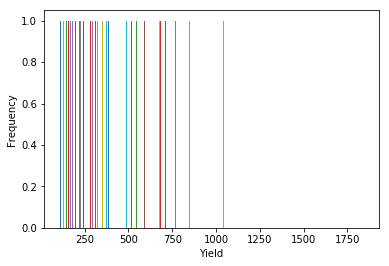

In [25]:
import random

# I get all the values as a numpy array here
all_values = df.iloc[:,1:].values

# List of lists are turned into Numpy arrays to facilitate calculations in steps to follow (Normalization).
all_values = np.array(all_values, dtype = float) 
print("Shape of Values:", all_values.shape)
all_labels = np.array(all_labels, dtype = float)
print("Shape of Labels:", all_labels.shape)

# Uncomment the line below to shuffle the dataset (we do not do this here to ensure consistent results for every run)
order = list(range(0, len(df)))
random.shuffle(order)         # This numpy argsort returns the indexes that would be used to shuffle a list
#order = np.arange(len(df))
some_values = all_values[order]
some_labels = all_labels[order]
some_materials = (df.iloc[:,0].values)[order]

# We'll use this for the splitting of our data in to training and testing
length = int(np.rint(0.10*len(df)))

# Training Set
train_labels = some_labels[:(len(df) - length)]
train_values = some_values[:(len(df) - length)]

# Testing Set
test_labels = some_labels[-length:]
test_values = some_values[-length:]

# NORMALIZATION

mean = np.mean(train_values, axis = 0) # mean
std = np.std(train_values, axis = 0) # standard deviation

# Here, it's possible to get a column of only zeros into the train_values through shuffling.
# Thus, we should have an 'if' statement for in case the column is all zeros because then, 
# the standard deviation will also be zero, and we'll be dividing by zero
'''
for i in range(0, len(std)):
    if std[i] != 0:
        train_values[i] = (train_values[i] - mean[i]) / std[i]
        test_values[i] = (test_values[i] - mean[i]) / std[i]

'''
train_values = (train_values - mean) / std # input scaling
test_values = (test_values - mean) / std # input scaling

# This line is used for labels in the plots
labeled_materials = [some_materials[x] for x in order[(len(df)-length):]] 
materials = [some_materials[x] for x in order]
#print(order)
print("Sample entry from training set")
print(train_values[0]) # print a sample entry from the training set

# Here is the average and standard devation of the hardness for reference (uncomment if you wish to see them)
hardness_avg = np.mean(all_labels)
hardness_std = np.std(all_labels)
print(hardness_avg) 
print(hardness_std)

# Uncomment if you want to see a distribution of the hardness values
plt.hist(df['avg_yield'])
plt.xlabel('Yield')
plt.ylabel('Frequency')

NameError: name 'all_labels' is not defined

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Restoring model weights from the end of the best epoch.
Epoch 04906: early stopping


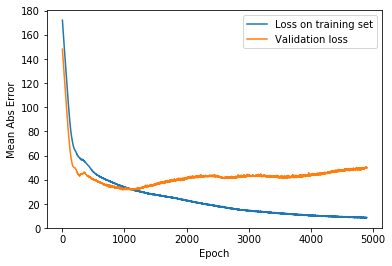

12.346695262498535 60.85414928860135


In [14]:
# Training!  

# DEFINITION OF THE MODEL
from keras.layers import LeakyReLU
# The weights of our neural network will be initialized in a random manner, using a seed allows for reproducibility
kernel_init = initializers.RandomNormal()

model = Sequential()
model.add(Dense(36, activation='sigmoid', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init))
model.add(Dense(22, activation='sigmoid', kernel_initializer=kernel_init))
model.add(Dense(1, kernel_initializer=kernel_init))

# DEFINITION OF THE OPTIMIZER

optimizer = tf.train.RMSPropOptimizer(0.002) # Root Mean Squared Propagation

# This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
# model.summary() # Comment this out if you don't want to see the model summary

class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + '\r') # Updates current Epoch Number

mae_es= keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=100, verbose=1, mode='auto', restore_best_weights=True)    
EPOCHS = 10000 # Number of EPOCHS

# HISTORY Object which contains how the model learned
# Training Values (Properties), Training Labels 
history = model.fit(train_values, train_labels, 
                        epochs = EPOCHS, verbose = False, validation_split = 0.10, callbacks=[mae_es, PrintEpNum()]) 


[loss_train, mae_train] = model.evaluate(train_values, train_labels, verbose=0)
[loss_test, mae_test] = model.evaluate(test_values, test_labels, verbose=0)


plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),label = 'Validation loss')
plt.legend()
plt.show()

# Display the same information being written to the file
print(" ".join(str(x) for x in [mae_train, mae_test]))

In [619]:
# PLOTTING

test_predictions = model.predict(test_values).flatten()
'''
print("Materials in Test Set: ", labeled_materials)
print("Real Values", list(test_labels))
print("Predictions", list(test_predictions))
'''
values = np.concatenate((train_values, test_values), axis=0) # This line joins the values together to evaluate all of them
predictions = model.predict(values).flatten()

In [620]:
# PLOTTING
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

plotly.offline.init_notebook_mode(connected=True)

layout0= go.Layout(title= "Hardness", hovermode= 'closest',
    xaxis= dict(title= 'Real Values',zeroline= False, gridwidth= 2),
    yaxis= dict(title= 'Predictions',zeroline= False, gridwidth= 2),
    showlegend= False                 
)

trace0 = go.Scatter(x = all_labels, y = predictions, mode = 'markers', marker= dict(size= 12, color= 'blue'), text= materials)
trace1 = go.Scatter(x = test_labels, y = test_predictions, mode = 'markers', marker= dict(size= 12, color= 'red'), text = labeled_materials)

trace2 = go.Scatter(x = [0,500], y = [0,500], mode = 'lines', name = "Match") # This trace is the line X = Y which would indicate that the Prediction equals the real value

data = [trace0, trace1, trace2]
fig= go.Figure(data, layout=layout0)
iplot(fig)